In [102]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [103]:
df = pd.read_csv('../data/happiness_dataset_merged.csv')

In [104]:
# Instance of LabelEncoder
label_encoder = LabelEncoder()

# convert continent into numeric value
df['continent_numeric'] = label_encoder.fit_transform(df['continent'])
df['country_numeric'] = label_encoder.fit_transform(df['country'])

In [105]:
df.head()

,country,happiness_rank,happiness_score,GDP_per_capita,life_expectancy,freedom,perceptions_corruption,generosity,year,ISO2,continent,continent_numeric,country_numeric
0,Arab Republic of Egypt,135,4.194,0.881800,0.617120,0.17288,0.063240,0.112910,2015,EG,Africa,0,0
1,Arab Republic of Egypt,120,4.362,0.953950,0.521160,0.18847,0.103930,0.127060,2016,EG,Africa,0,0
2,Arab Republic of Egypt,104,4.735,0.989702,0.520187,0.28211,0.114381,0.128631,2017,EG,Africa,0,0
3,Arab Republic of Egypt,122,4.419,0.885000,0.553000,0.31200,0.107000,0.092000,2018,EG,Africa,0,0
4,Arab Republic of Egypt,137,4.166,0.913000,0.644000,0.24100,0.067000,0.076000,2019,EG,Africa,0,0


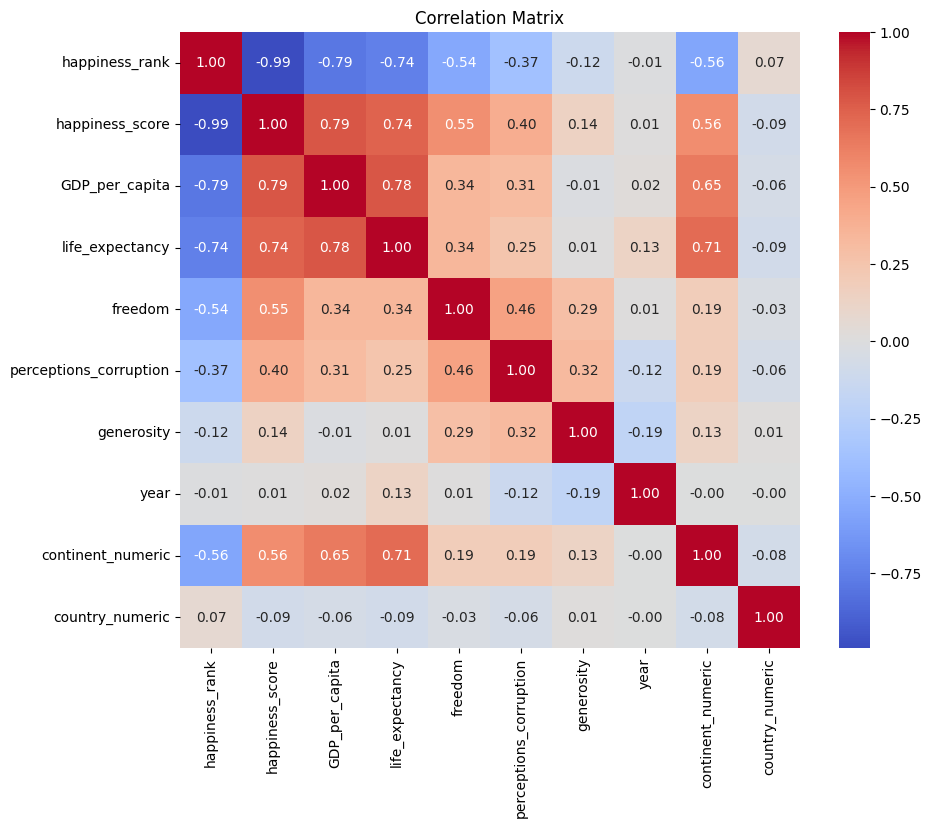

In [ ]:
# Features selection
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Matrix")
plt.show()


As we can observe, the variables that are most strongly related to the `happiness_score` are:

- `GDP_per_capita`
- `life_expectancy`
- `freedom`
- `perception_corruption`
- `continent_numeric`

Although `country_numeric` does not have a high correlation, it is included to increase the R^2 score; however, it would be better to remove it from the model.

On the other hand, variables such as `generosity` and `year` do not provide any significant contribution to this target variable. 

Additionally, while `happiness_rank` exhibits a high negative correlation (-0.99) with `happiness_score`, it is excluded from the model training process since it is derived from the target variable itself and does not add predictive value.

As a result, these last three features (`generosity`, `year`, and `happiness_rank`) are omitted from the training dataset to improve model efficiency and avoid redundancy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# split data into X and y
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=["happiness_rank","happiness_score","year", "generosity"], errors='ignore')
y = df['happiness_score']

# Divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model training code omitted

In [94]:
from joblib import dump, load

# Export the model to a file
dump(xgboost_model, '../models/xgboost_model.joblib')


['../models/xgboost_model.joblib']

In [95]:
# Load the model from the file
xgboost_model_loaded = load('../models/xgboost_model.joblib')

In [98]:
# Data for prediction
new_data = pd.DataFrame({
    'GDP_per_capita': [1.08],  
    'life_expectancy': [0.75],  
    'freedom': [0.58],  
    'perceptions_corruption': [0.05],  
    'continent_numeric' : [2],
    'country_numeric' : [0]
})

In [99]:
# Predict the happiness score
predicted_happiness_score = xgboost_model_loaded.predict(new_data)

# Print the predicted happiness score
print("The happiness_score predict is:", predicted_happiness_score[0])


The happiness_score predict is: 5.8118744
